<a href="https://colab.research.google.com/github/Jayden-Nyamiaka/Machine-Learning-and-Data-Mining/blob/main/nyamiaka_jayden_3_notebook_part2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Problem 3, Parts G-I: Stochastic Gradient Descent with a Larger Dataset**

Use this notebook to write your code for problem 3 parts G-I by filling in the sections marked `# TODO` and running all cells.


In [ ]:
# Setup.

import numpy as np
import matplotlib.pyplot as plt
import math

%matplotlib inline

## Problem 3G: Perform SGD with the new dataset

For the functions below, you may re-use your code from parts 3D-F. Note that you can now modify your SGD function to return the final weight vector instead of the weights after every epoch.



In [ ]:
'''
Calculate the squared loss function.

Inputs:
    X: A (N, D) shaped numpy array containing the data points.
    Y: A (N, ) shaped numpy array containing the (float) labels of the data points.
    w: A (D, ) shaped numpy array containing the weight vector.

Outputs:
    The loss evaluated with respect to X, Y, and w.
'''
def loss(X, Y, w):
  total = 0
  for i in range(Y.size):
    predict_i = w.dot(X[i])
    error = (predict_i - Y[i]) ** 2
    total += error
  return total


'''
Calculate the gradient of the loss function with respect to the weight vector w,
evaluated at a single point (x, y) and weight vector w.

Inputs:
    x: A (D, ) shaped numpy array containing a single data point.
    y: The float label for the data point.
    w: A (D, ) shaped numpy array containing the weight vector.
    
Output:
    The gradient of the loss with respect to w. 
'''
def gradient(x, y, w):
  return -2 * (y - w.dot(x)) * x


'''
Perform SGD using dataset (X, Y), initial weight vector w_start,
learning rate eta, and N_epochs epochs.

Inputs:
    X: A (N, D) shaped numpy array containing the data points.
    Y: A (N, ) shaped numpy array containing the (float) labels of the data points.
    w_start:  A (D, ) shaped numpy array containing the weight vector initialization.
    eta: The step size.
    N_epochs: The number of epochs (iterations) to run SGD.
    
Outputs:
    w: A (D, ) shaped array containing the final weight vector.
    losses: A (N_epochs, ) shaped array containing the losses from all iterations.
'''
def SGD(X, Y, w_start, eta, N_epochs):
  N = Y.size
  D = len(w_start)
  W = np.zeros((N_epochs, D))
  losses = np.zeros(N_epochs, )
  w = np.array(w_start)
  for n in range(N_epochs):
    # Trains the model defined by weight vector w_start for this epoch
    for i in np.random.permutation([*range(N)]):
      w -= eta * gradient(X[i], Y[i], w)
    # Computes the loss for the model at the end of this epoch
    losses[n] = loss(X, Y, w)
  return w, losses

Next, we need to load the dataset. In doing so, the following function may be helpful:



In [ ]:
def load_data(filename):
    """
    Function loads data stored in the file filename and returns it as a numpy ndarray.
    
    Inputs:
        filename: GeneratorExitiven as a string.
    
    Outputs:
        Data contained in the file, returned as a numpy ndarray
    """
    return np.loadtxt(filename, skiprows=1, delimiter=',')

Now, load the dataset in ``sgd_data.csv`` and run SGD using the given parameters; print out the final weights.

In [ ]:
# Given parameters
weight_elements = 5
starting_weight = 0.001
w_start = [starting_weight] * weight_elements
eta = math.e ** (-15)
N_epochs = 800

# Reads in data from csv file
data = load_data('https://raw.githubusercontent.com/emiletimothy/Caltech-CS155-2023/main/set1/src/data/sgd_data.csv')

# Saves Y and X values, appending 1 as an element to every point to account for bias term
Y = data[:, weight_elements - 1]
X = np.zeros((Y.shape[0], weight_elements))
i = 0
for x in data[:, 0 : weight_elements-1]:
  X[i] = np.append(x, 1)
  i += 1

In [ ]:
# Computes Stochastic Gradient Descent
w, losses = SGD(X, Y, w_start, eta, N_epochs)

# Prints the Final Weights
print("Final weights:", w[0:4], "\nFinal bias term:", w[4])
print("With Loss:", losses[N_epochs - 1])

Final weights: [ -5.94209816   3.94391425 -11.72383085   8.78568865] 
Final bias term: -0.2271698736319544
With Loss: 4826.269754737546


# Problem 3H: Convergence of SGD

This problem examines the convergence of SGD for different learning rates. Please implement your code in the cell below:

Text(0.5, 1.0, 'SGD Convergence for Different Learning Rates')

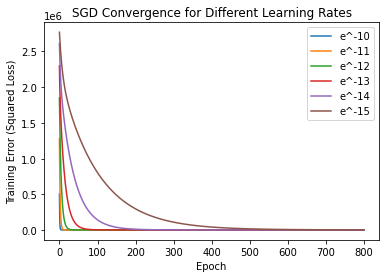

In [ ]:
'''Plotting SGD convergence for Different Learning Rates'''

# Given parameters
eta_vals = [math.e**(-10), math.e**(-11), 
            math.e**(-12), math.e**(-13), 
            math.e**(-14), math.e**(-15)]

# Creates the plot
plt.figure()

# Plots the losses against epochs for each different step size
epochs = [*range(N_epochs)]
etas = len(eta_vals)
losses = np.zeros((etas, N_epochs))
for i in range(etas):
  _, losses[i] = SGD(X, Y, w_start, eta_vals[i], N_epochs)
  plt.plot(epochs, losses[i])

# Labels the figure
plt.legend(["e^-10","e^-11","e^-12","e^-13","e^-14","e^-15"], loc = 'best')
plt.xlabel('Epoch')
plt.ylabel('Training Error (Squared Loss)')
plt.title('SGD Convergence for Different Learning Rates')

# Problem 3I

Provide your code for computing the least-squares analytical solution below.



In [ ]:

'''
Computes the finals weight vector analytially 
using closed form solution for linear regression with least squares.

Inputs:
    X: A (N, D) shaped numpy array containing the data points.
    Y: A (N, ) shaped numpy array containing the (float) labels of the data points.
    
Outputs:
    w: A (D, ) shaped array containing the final weight vector.
'''
def compute_weights_analytical(X, Y):
  X_tranpose = X.T
  inv_xx = np.linalg.pinv(X_tranpose.dot(X))
  xy = X_tranpose.dot(Y)
  out = inv_xx.dot(xy)
  return out

w = compute_weights_analytical(X, Y)
loss = loss(X, Y, w)

# Prints the Final Weights
print("Final weights:", w[0:4], "\nFinal bias term:", w[4])
print("With Loss:", loss)



Final weights: [ -5.99157048   4.01509955 -11.93325972   8.99061096] 
Final bias term: -0.3164425132713973
With Loss: 4071.140386809389
